In [1]:
USE_MP=False
import silq
silq.initialize("EWJN")

qc.show_subprocess_widget()
%matplotlib nbagg

Initializing imports


<IPython.core.display.Javascript object>

Initializing functions
Initializing instruments
Connected to: Agilent Technologies E8267D (serial:SG53400039, firmware:C.06.22) in 0.04s
Initializing layout
Initializing data
Initializing analysis
Initializing parameters
Initializing plotting
Initialization complete


total_channel_value: 8
total_channel_value: 0
total_channel_value: 1
total_channel_value: 0
total_channel_value: 1
total_channel_value: 0
total_channel_value: 1
total_channel_value: 0
total_channel_value: 1


<IPython.core.display.Javascript object>


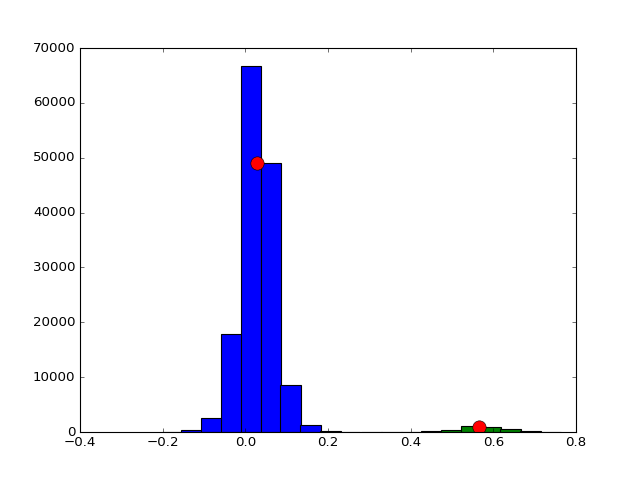

In [2]:
ELR_parameter.setup(samples=30)
ELR_parameter()
traces_read = ELR_parameter.trace_segments['output']['read']
_, _, threshold_voltage = analysis.find_high_low(traces_read, plot=True)

In [24]:
steered_initialization = SteeredInitialization(name='steered_initialization',
                                               t_no_blip=50, t_max_wait=200, t_buffer=50)
steered_controller.record_initialization_traces(True)

load_pulse = DCPulse(name='load', amplitude=1.5, duration=5, acquire=True)
read_pulse = DCPulse(name='read', amplitude=0, duration=50, acquire=True)
final_pulse = DCPulse(name='final', amplitude=0, duration=2)
pulse_sequence = PulseSequence([steered_initialization, load_pulse, read_pulse, final_pulse])

layout.target_pulse_sequence(pulse_sequence)
layout.setup(samples=2,
             readout_threshold_voltage=threshold_voltage)

total_channel_value: 4
total_channel_value: 5
total_channel_value: 4
total_channel_value: 1
total_channel_value: 0
total_channel_value: 1


In [22]:
layout.stop()

In [20]:
pulseblaster.start()

0

In [25]:
result = layout.do_acquisition()

Starting active 0.07 s
starting readout after 0.12 s, buffers 1
finished trace after 0.21 s
Starting active 0.05 s
starting readout after 0.11 s, buffers 1
finished trace after 0.20 s


<IPython.core.display.Javascript object>


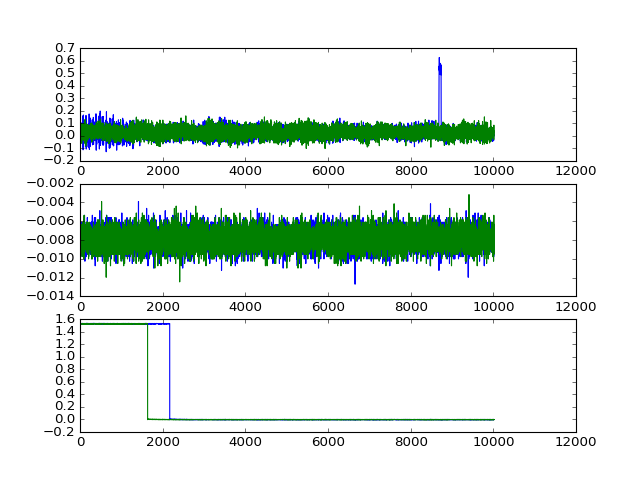

In [26]:
fig, axes = plt.subplots(3,1)
for k, ax in enumerate(axes):
    axes[k].plot(result[k].transpose())

In [11]:
interfaces['arbstudio'].pulse_sequence()

PulseSequence with 9 pulses, duration: 57
	DCPulseImplementation(load, A=1.5, t_start=0, t_stop=5
		connection: Connection{arbstudio.ch1->chip.TGAC}())
	DCPulseImplementation(load, A=-2.25, t_start=0, t_stop=5
		connection: Connection{arbstudio.ch2->chip.DF}())
	DCPulseImplementation(load, A=1.5, t_start=0, t_stop=5
		connection: Connection{arbstudio.ch3->ATS.chC}())
	DCPulseImplementation(read, A=0, t_start=5, t_stop=55
		connection: Connection{arbstudio.ch1->chip.TGAC}()
		additional_pulses:
		TriggerPulse(, t_start=5, duration=0.0001
			requirements: {'input_instrument': 'arbstudio', 'trigger': True}))
	DCPulseImplementation(read, A=-0.0, t_start=5, t_stop=55
		connection: Connection{arbstudio.ch2->chip.DF}())
	DCPulseImplementation(read, A=0, t_start=5, t_stop=55
		connection: Connection{arbstudio.ch3->ATS.chC}())
	DCPulseImplementation(final, A=0, t_start=55, t_stop=57
		connection: Connection{arbstudio.ch1->chip.TGAC}()
		additional_pulses:
		TriggerPulse(, t_start=55, duration=0

In [25]:
layout.start()

In [51]:
pulseblaster.start()

0

In [53]:
arbstudio.waveforms()

[[array([ 1.5,  1.5,  1.5,  1.5]),
  array([ 0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.])],
 [array([-2.25, -2.25, -2.25, -2.25]),
  array([-0., -0., -0., -0.]),
  array([-0., -0., -0., -0.])],
 [array([ 1.5,  1.5,  1.5,  1.5]),
  array([ 0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.])],
 []]

In [52]:
arbstudio.ch3_sequence()

[0, 1, 2]

In [74]:
interfaces['pulseblaster'].pulse_sequence()

PulseSequence with 4 pulses, duration: 57.0001
	MarkerPulseImplementation(, t_start=0, duration=55
		connection: Connection{pulseblaster.ch3->ATS.chB}(, trigger)
		requirements: {'connection': Connection{pulseblaster.ch3->ATS.chB}(, trigger)})
	TriggerPulseImplementation(, t_start=5, duration=0.0001
		connection: Connection{pulseblaster.ch1->arbstudio.trig_in}(, trigger)
		requirements: {'input_instrument': 'arbstudio', 'trigger': True})
	TriggerPulseImplementation(, t_start=55, duration=0.0001
		connection: Connection{pulseblaster.ch1->arbstudio.trig_in}(, trigger)
		requirements: {'input_instrument': 'arbstudio', 'trigger': True})
	TriggerPulseImplementation(, t_start=57, duration=0.0001
		connection: Connection{pulseblaster.ch1->arbstudio.trig_in}(, trigger)
		requirements: {'input_instrument': 'arbstudio', 'trigger': True})

# For PyCharm console

In [ ]:
USE_MP=False
import silq
silq.initialize("EWJN")


ELR_parameter.setup(samples=50)
ELR_parameter()
traces_read = ELR_parameter.trace_segments['output']['read']
_, _, threshold_voltage = analysis.find_high_low(traces_read, plot=True)


steered_initialization = SteeredInitialization(name='steered_initialization',
                                               t_no_blip=50, t_max_wait=200, t_buffer=5)
load_pulse = DCPulse(name='load', amplitude=1.5,
                     duration=5, acquire=True)
read_pulse = DCPulse(name='read', amplitude=0,
                      duration=50, acquire=True)
final_pulse = DCPulse(name='final', amplitude=0,
                      duration=2)
pulses = [steered_initialization, load_pulse, read_pulse, final_pulse]
pulse_sequence = PulseSequence(pulses=pulses)

layout.target_pulse_sequence(pulse_sequence)

layout.setup(samples=3,
             readout_threshold_voltage=threshold_voltage)